In [1]:
import pandas as pd
import os
from progressbar import ProgressBar
import numpy as np
import numpy as np
import re
import math
import spacy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [9]:
fd3 = pd.read_csv('../data/task1/all-features.csv')

In [10]:
def dropColumns(data, collist):
    data = data.drop(columns=collist)
    return data

In [11]:
fd3 = dropColumns(fd3, ['Dialogues', 'Dial'])

In [12]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
fd3 = shuffle(fd3).reset_index(drop=True)

In [14]:
train, test = train_test_split(fd3, test_size = 0.20)
trainlabels = train.pop('Gender')
testlabels = test.pop('Gender')

In [15]:
def getResults(predictions, testlabels):
    print("Accuracy: ", accuracy_score(testlabels, predictions))
    cm = confusion_matrix(testlabels, predictions)
    fig = plt.subplots(figsize=[4,4])
    fig = sns.heatmap(cm/np.sum(cm), fmt='.2%',annot=True, cmap='Blues', cbar=False)
    plt.xticks([0.5, 1.5], ['Male','Female'])
    plt.yticks([0.5, 1.5], ['Male','Female'])
    plt.xlabel('Predicted Genders')
    plt.ylabel('Actual Genders')

## 3. kMeans

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train, trainlabels)

KMeans(n_clusters=2, random_state=0)

Accuracy:  0.5086636600996914


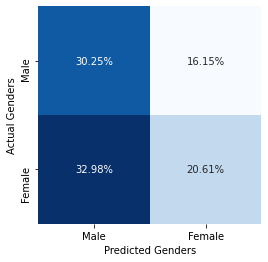

In [17]:
predictions = kmeans.predict(test)
getResults(testlabels, predictions)

In [18]:
pickle.dump(kmeans, open("./models/kmeans-task1", 'wb'))

## 4. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=400)
rfc.fit(train, trainlabels)

RandomForestClassifier(n_estimators=400, random_state=1)

Accuracy:  0.7129124139568004


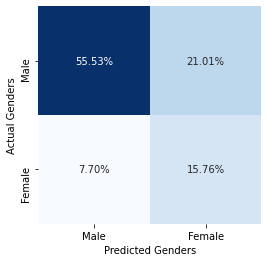

In [20]:
predictions = rfc.predict(test)
getResults(testlabels, predictions)

In [21]:
pickle.dump(kmeans, open("./models/rfc-task1", 'wb'))

## 5. Logistic Regression

In [22]:
logreg = LogisticRegression(random_state=42).fit(train, trainlabels)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.6707809162117256


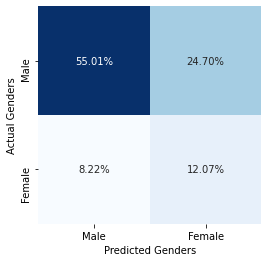

In [23]:
predictions = logreg.predict(test)
getResults(testlabels, predictions)

In [24]:
pickle.dump(logreg, open("./models/LogReg-task1", 'wb'))